In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

ModuleNotFoundError: No module named 'seaborn'

In [3]:
#!pip install matplotlib

In [6]:
#!pip install pandas

In [ ]:
!pip install seaborn

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

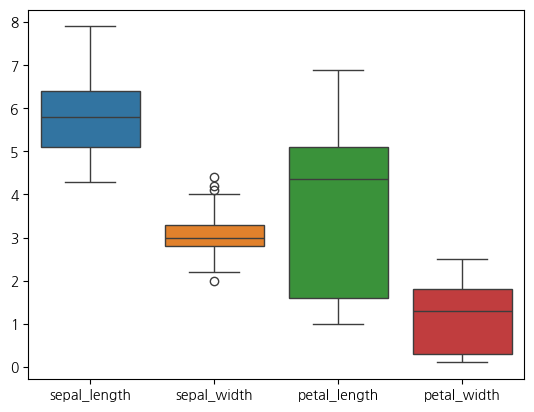

In [6]:
sns.boxplot(data)

In [7]:
# 결측치와 이상치 처리가 따로 필요하지 않음 -> 완벽히 전처리된 데이터
data['species'].value_counts(normalize=True)

species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

## 홀드아웃
- 3개의 독립적인 데이터가 나옴(species 컬럼) -> LabelEncoder를 통해 0,1,2로 변환
- 이렇게 변환된 데이터를 train / test 데이터로 나눔

In [24]:
# from sklearn.preprocessing import LabelEncoder

In [1]:
# le = LabelEncoder()
# X = data.drop('species', axis=1)
# y = le.fit_transform(data['species'])

In [5]:
X = data.drop('species', axis=1)
y = pd.get_dummies(data['species'])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [9]:
y_train

,Iris-setosa,Iris-versicolor,Iris-virginica
22,True,False,False
15,True,False,False
65,False,True,False
11,True,False,False
42,True,False,False
...,...,...,...
71,False,True,False
106,False,False,True
14,True,False,False
92,False,True,False


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
mms = MinMaxScaler()
train_temp = mms.fit_transform(X_train)
test_temp = mms.fit_transform(X_test)
mms_X_train = pd.DataFrame(train_temp, columns=X_train.columns, index=X_train.index)
mms_X_test = pd.DataFrame(test_temp, columns=X_test.columns, index=X_test.index)


# Tensorflow 다중분류 분석

In [12]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense

2025-05-15 11:39:53.707724: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-15 11:39:53.780715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747276793.850767   30237 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747276793.880799   30237 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747276793.926517   30237 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## 1. Sequencial API

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
mms_X_train.shape[1]

4

In [51]:
# 모델 적용
model = Sequential()

# 입력층
model.add(Input(shape=(mms_X_train.shape[1],)))

# 은닉층 
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))

# 출력층
model.add(Dense(3, activation='softmax'))


- 다중분류의 경우 사용하는 loss
    - categorical_crossentropy : 종속변수 클래스가 3개 이상인 경우이면서 원핫인코딩이 된 경우
    - sparse_categorical_crossentropy : 종속변수 클래스가 3개 이상인 경우이면서 레이블 인코딩이 된 경우

In [52]:
# 모델 파라미터 세팅
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267 (1.04 KB)

 Trainable params: 267 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=16, 
                    validation_data=(mms_X_test, y_test))

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 908ms/step - accuracy: 0.3577 - loss: 1.1097 - val_accuracy: 0.3000 - val_loss: 1.1154
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3438 - loss: 1.1070 - val_accuracy: 0.3000 - val_loss: 1.1134
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.3390 - loss: 1.1079 - val_accuracy: 0.3000 - val_loss: 1.1108
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3914 - loss: 1.1020 - val_accuracy: 0.2333 - val_loss: 1.1061
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5376 - loss: 1.0956 - val_accuracy: 0.4333 - val_loss: 1.1006
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.4722 - loss: 1.0910 - val_accuracy: 0.5000 - val_loss: 1.0942
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.4283 - loss: 1.0848 - val_accuracy: 0.3667 - val_loss: 1.0856
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.4023 - loss: 1.0763 - val_accuracy: 0.3667 - val_lo

Epoch 52/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7163 - loss: 0.6494 - val_accuracy: 0.6000 - val_loss: 0.6743
Epoch 53/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7030 - loss: 0.6935 - val_accuracy: 0.6000 - val_loss: 0.6722
Epoch 54/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6513 - loss: 0.6573 - val_accuracy: 0.6000 - val_loss: 0.6690
Epoch 55/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7315 - loss: 0.6469 - val_accuracy: 0.6333 - val_loss: 0.6630
Epoch 56/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6599 - loss: 0.6630 - val_accuracy: 0.6333 - val_loss: 0.6599
Epoch 57/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.6512 - loss: 0.6423 - val_accuracy: 0.6333 - val_loss: 0.6582
Epoch 58/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6551 - loss: 0.6637 - val_accuracy: 0.6000 - val_loss: 0.6583
Epoch 59/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6716 - loss: 0.7030 - val_accuracy: 0.6000 - v

In [54]:
pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred, index=y_test.index)
result = pd.concat([y_test, pred], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [55]:
score = model.evaluate(mms_X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 0.5895
test loss 0.5894818902015686
test accuracy 0.6000000238418579


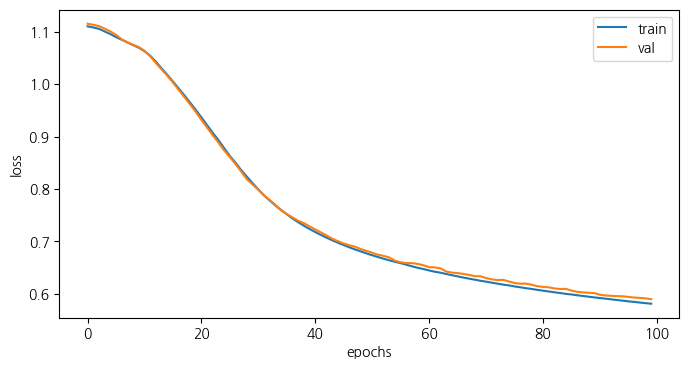

In [56]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()



## Functional API

In [36]:
from keras.models import Model
from sklearn.metrics import classification_report

In [33]:
# 입력층 
inputs = Input(shape=(mms_X_train.shape[1],))

# 은닉층
x1 = Dense(16, activation='relu')(inputs)
x2 = Dense(8, activation='relu')(x1)
x3 = Dense(4, activation='relu')(x2)

# 출력층
outputs = Dense(3, activation='softmax')(x3)

# 모델 정의
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267 (1.04 KB)

 Trainable params: 267 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# 모델 적용
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=16, validation_data=(mms_X_test, y_test))

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 969ms/step - accuracy: 0.3190 - loss: 1.2015 - val_accuracy: 0.3333 - val_loss: 1.2099
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.3183 - loss: 1.1939 - val_accuracy: 0.3333 - val_loss: 1.1864
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.2668 - loss: 1.1732 - val_accuracy: 0.3333 - val_loss: 1.1688
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.3148 - loss: 1.1461 - val_accuracy: 0.3333 - val_loss: 1.1571
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.3097 - loss: 1.1494 - val_accuracy: 0.3333 - val_loss: 1.1448
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.3353 - loss: 1.1297 - val_accuracy: 0.3333 - val_loss: 1.1347
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.3135 - loss: 1.1206 - val_accuracy: 0.3333 - val_loss: 1.1249
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.3600 - loss: 1.1100 - val_accuracy: 0.3333 - val_

Epoch 52/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.7228 - loss: 0.5492 - val_accuracy: 0.6333 - val_loss: 0.5925
Epoch 53/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6863 - loss: 0.5543 - val_accuracy: 0.6333 - val_loss: 0.5857
Epoch 54/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.6450 - loss: 0.5665 - val_accuracy: 0.6333 - val_loss: 0.5800
Epoch 55/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6864 - loss: 0.5464 - val_accuracy: 0.6333 - val_loss: 0.5762
Epoch 56/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6626 - loss: 0.5743 - val_accuracy: 0.6333 - val_loss: 0.5720
Epoch 57/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6381 - loss: 0.5587 - val_accuracy: 0.6333 - val_loss: 0.5659
Epoch 58/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6758 - loss: 0.5455 - val_accuracy: 0.6333 - val_loss: 0.5607
Epoch 59/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6472 - loss: 0.5442 - val_accuracy: 0.6333 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


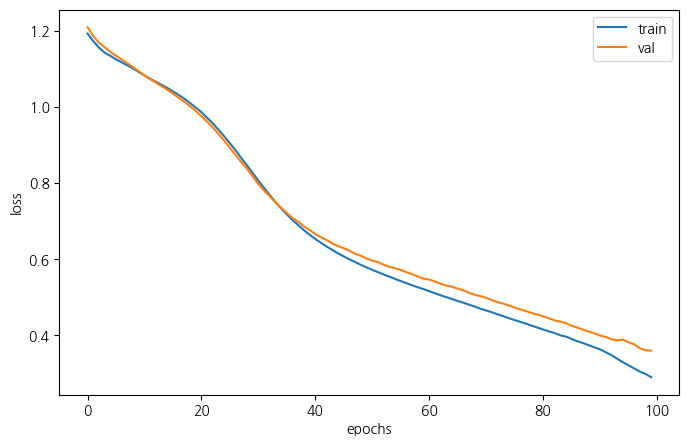

In [43]:
# test 데이터에 대한 예측 수행
pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred, index=y_test.index)
result = pd.concat([y_test, pred], axis=1)

# 실행 결과 확인
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## Subclass API

In [48]:
class iris_model(Model):
    
    def __init__(self):
        super(iris_model, self).__init__()
        self.dense1 = Dense(16, activation='relu')
        self.dense2 = Dense(8, activation='relu')
        self.dense3 = Dense(4, activation='relu')
        self.classifier = Dense(3, activation='softmax')
    
    def call(self, inputs):
        x1 = self.dense1(inputs)
        x2 = self.dense2(x1)
        x3 = self.dense3(x2)
        return self.classifier(x3)
        

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.3919 - loss: 1.0709 - val_accuracy: 0.5000 - val_loss: 1.0588
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5313 - loss: 1.0475 - val_accuracy: 0.6000 - val_loss: 1.0351
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6578 - loss: 1.0270 - val_accuracy: 0.7000 - val_loss: 1.0111
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6705 - loss: 1.0048 - val_accuracy: 0.6667 - val_loss: 0.9871
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6412 - loss: 0.9914 - val_accuracy: 0.6667 - val_loss: 0.9633
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6576 - loss: 0.9678 - val_accuracy: 0.7000 - val_loss: 0.9395
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7016 - loss: 0.9307 - val_accuracy: 0.7000 - val_loss: 0.9150
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6706 - loss: 0.9120 - val_accuracy: 0.7000 - val_loss: 

Epoch 52/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9465 - loss: 0.3180 - val_accuracy: 0.8667 - val_loss: 0.3373
Epoch 53/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9395 - loss: 0.3480 - val_accuracy: 0.8667 - val_loss: 0.3265
Epoch 54/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9691 - loss: 0.3097 - val_accuracy: 0.8667 - val_loss: 0.3164
Epoch 55/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9541 - loss: 0.3063 - val_accuracy: 0.8667 - val_loss: 0.3220
Epoch 56/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9806 - loss: 0.2732 - val_accuracy: 0.8667 - val_loss: 0.3078
Epoch 57/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9674 - loss: 0.2654 - val_accuracy: 0.8667 - val_loss: 0.3036
Epoch 58/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9453 - loss: 0.2766 - val_accuracy: 0.8667 - val_loss: 0.3090
Epoch 59/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9818 - loss: 0.2278 - val_accuracy: 0.8667 - v

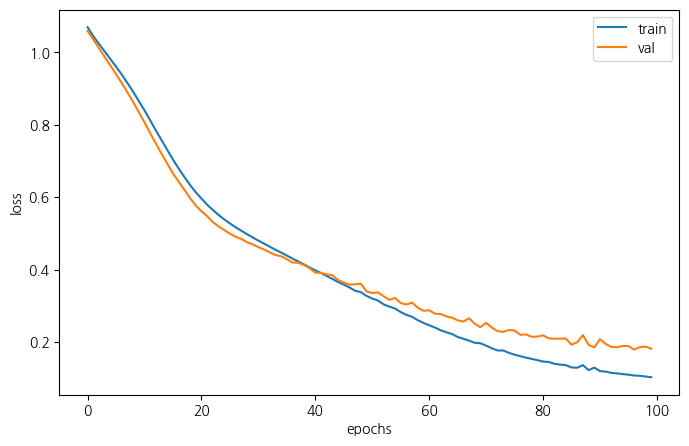

In [50]:
# 클래스 형태의 모델 컴파일 및 적용
model = iris_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=16, validation_data=(mms_X_test, y_test))

# test 데이터에 대한 예측 수행
pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred, index=y_test.index)
result = pd.concat([y_test, pred], axis=1)

# 실행 결과 확인
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()